In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Load in data

In [2]:
matrix = pd.read_csv('final_data/final_matrix_1209.csv')

In [3]:
matrix.shape

(14157, 65)

In [4]:
matrix.head()

,ARTIST,ISRC,SPOTIFY_ID,TITLE,lyrics,song_id,producer,number_of_tracks,number_of_albums,number_of_playlists,...,ACOUSTIC,MODE,missing_producer,producer_count,a_producer,a_producer_count,missing_writer,writer_count,a_writer,a_writer_count
0,Yo La Tengo,USMTD0985602,158mw0CsuSHxTVWpMwN2Lp,Avalon or Someone Very Similar,"\n\nAvalon, how did these things happen? Avalo...",1369717,['Roger Moutenot'],143,40,649,...,0.2280,1,0,1,0,0,1,0,0,0
1,Yo La Tengo,USGKX9802104,7iX2vtYJlemPod7080OxTG,Swing For Life,"\n\nOh, true rider, fasten me\nI saw a mystery...",1063052,[],143,40,649,...,0.0796,1,1,0,0,0,1,0,0,0
2,Yo La Tengo,USMTD1810576,2YmjVaikl30rmZZzlGTwPE,Ashes,"\n\nI put spots on a bird of paradise, snake e...",3596137,['Yo La Tengo'],143,40,649,...,0.9030,1,0,1,0,0,0,3,0,0
3,Smrtdeath,QZANL1773974,4sBj3qUIPBkIMcRVlh6iXI,Let It Bleed,"\n\n[Intro]\nSethany, Sethany, Sethany\nYeah, ...",3150542,['Taxpurposes'],10,10,30,...,0.0960,1,0,1,0,0,0,1,0,0
4,Smrtdeath,QZANL1773973,3gjrflTTriqZ9d30uSF4hP,Went & Got Some More,"\n\n[Hook: Smrtdeath]\nI just lost some drugs,...",3256462,"['Eternal Night', 'Sorry If I Waste Your Time']",10,10,30,...,0.2870,1,0,2,0,0,0,2,0,0


In [5]:
matrix.columns.values

array(['ARTIST', 'ISRC', 'SPOTIFY_ID', 'TITLE', 'lyrics', 'song_id',
       'producer', 'number_of_tracks', 'number_of_albums',
       'number_of_playlists', 'playlist_followers',
       'highest_song_popularity', 'average_song_popularity',
       'A_Level_Artist?', 'B_Level Artist?', 'max_popularity', 'Blues',
       'Christian/Gospel', 'Country', 'Dance/Electro', 'Disco',
       'Dutch-House', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Latin',
       'Metal', 'Other', 'Pop', 'R&B', 'Reggae', 'Rock/Alt',
       'Rock/Alt/Pop', 'Singer-Songwriter', 'genre_missing', 'Explicit',
       'genres', 'adjusted_label', 'sentiment', 'word_count',
       'repetition_share', 'Lean-Back', 'POP', 'TIME_SIGNATURE', 'KEY',
       'TEMPO', 'Seconds', 'LOUD', 'LIVENESS', 'SPEECHINESS',
       'INSTRUMENTALNESS', 'VALENCE', 'DANCE', 'ENERGY', 'ACOUSTIC',
       'MODE', 'missing_producer', 'producer_count', 'a_producer',
       'a_producer_count', 'missing_writer', 'writer_count', 'a_writer',
       'a_writer_

In [6]:
features = [
       'Blues',
       'Christian/Gospel', 'Dance/Electro', 'Disco',
       'Dutch-House', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Latin', 'Metal',
       'Other', 'Pop', 'R&B', 'Reggae', 'Rock/Alt', 'Rock/Alt/Pop',
       'Singer-Songwriter', 'genre_missing', 'Explicit', 
       'sentiment', 'word_count', 'repetition_share',
       'Lean-Back', 'TIME_SIGNATURE', 'KEY', 'TEMPO', 'Seconds',
       'LOUD', 'LIVENESS', 'SPEECHINESS', 'INSTRUMENTALNESS', 'VALENCE',
       'DANCE', 'ENERGY', 'ACOUSTIC', 'MODE', 'missing_producer',
       'producer_count', 'a_producer', 'a_producer_count',
       'missing_writer', 'writer_count', 'a_writer', 'a_writer_count']

In [7]:
alt_target = ['adjusted_label']

In [8]:
target = [ 'max_popularity']

### Train test split

In [9]:
threshold = 70

In [10]:
train_id = np.load('id_train.npy')
test_id = np.load('id_test.npy')

In [11]:
train = matrix[matrix.ISRC.isin(train_id)]
test = matrix[matrix.ISRC.isin(test_id)]

In [12]:
train_x = train[features]
test_x = test[features]

train_y = (train[target] >= threshold)*1
test_y = (test[target] >= threshold)*1

In [13]:
all_1=test[test.max_popularity>=70]
all_1_inp = all_1[features]

In [14]:
print('Class distribution in test set', test_y.values.sum()/len(test_y))

Class distribution in test set 0.08559201141226819


In [15]:
print('Class distribution in train set', train_y.values.sum()/len(train_y))

Class distribution in train set 0.06947734091267961


In [16]:
print('Train size', train_x.shape)
print('Test size', test_x.shape)

Train size (12666, 45)
Test size (1402, 45)


In [28]:
def plot_roc(actual,forecast,name):
    
    #ROC
    fpr, tpr, thresholds = metrics.roc_curve(actual, forecast)

    #AUC
    aucc = roc_auc_score(test_y.astype('int'),predict_prob[:,1])

    plt.plot(fpr, tpr, label = name + ' AUC: '+str(round(aucc, 4)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Best Decision Tree ROC Curve')
    plt.grid(True)
    plt.legend(loc = 'lower right', title='AUC')

### Baseline

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(random_state=5, criterion='gini', 
                             max_depth=20, min_samples_split=5)

tree1.fit(train_x, train_y.astype('int'))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [18]:
prediction = tree1.predict(test_x)
predict_prob = tree1.predict_proba(test_x)

In [27]:
from sklearn.metrics import f1_score, recall_score, roc_auc_score

print('F1 score', f1_score(test_y.astype('int'), prediction))
print('Recall score', recall_score(test_y.astype('int'), prediction))
print('AUC', roc_auc_score(test_y.astype('int'),predict_prob[:,1]))

F1 score 0.3829787234042554
Recall score 0.375
AUC 0.6710348413936558


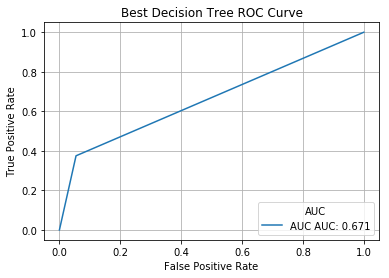

In [29]:
from sklearn import metrics
plot_roc(test_y, prediction, 'AUC')
plt.show()

In [32]:
from sklearn import tree
tree.export_graphviz(tree1, out_file='tree.dot', max_depth=2, feature_names = train_x.columns.values) 


In [33]:
!dot -Tpng tree.dot -o tree.png -Gdpi=100

In [425]:
#from IPython.display import Image
#Image(filename = 'tree.png')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [403]:
train_x.columns

Index(['Blues', 'Christian/Gospel', 'Dance/Electro', 'Disco', 'Dutch-House',
       'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Latin', 'Metal', 'Other', 'Pop',
       'R&B', 'Reggae', 'Rock/Alt', 'Rock/Alt/Pop', 'Singer-Songwriter',
       'genre_missing', 'Explicit', 'sentiment', 'word_count',
       'repetition_share', 'Lean-Back', 'TIME_SIGNATURE', 'KEY', 'TEMPO',
       'Seconds', 'LOUD', 'LIVENESS', 'SPEECHINESS', 'INSTRUMENTALNESS',
       'VALENCE', 'DANCE', 'ENERGY', 'ACOUSTIC', 'MODE', 'missing_producer',
       'producer_count', 'a_producer', 'a_producer_count', 'missing_writer',
       'writer_count', 'a_writer', 'a_writer_count'],
      dtype='object')

In [35]:
def show_most_informative_features(names, clf, n=20):
    feature_names = names
    coefs_with_fns = sorted(zip(clf.feature_importances_, feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print("\t\tPopular")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        
        print("\t%.4f\t%-15s" % (coef_2, fn_2))


show_most_informative_features(train_x.columns, tree1, 10)

		Popular
	0.1381	writer_count   
	0.0772	repetition_share
	0.0666	Seconds        
	0.0593	sentiment      
	0.0524	ACOUSTIC       
	0.0523	ENERGY         
	0.0484	Pop            
	0.0477	Explicit       
	0.0465	LIVENESS       
	0.0459	LOUD           


### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2',  C=0.5)
lr.fit(train_x, train_y.astype('int'))

/Users/ksenia/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [219]:
prediction_lr = lr.predict(test_x)
predict_prob_lr = lr.predict_proba(test_x)

In [220]:
print('F1 score', f1_score(test_y.astype('int'), prediction_lr))
print('Recall score', recall_score(test_y.astype('int'), prediction_lr))
print('AUC', roc_auc_score(test_y.astype('int'),predict_prob_lr[:,1]))

F1 score 0.0
Recall score 0.0
AUC 0.776534061362


### Random Forest

In [251]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, max_depth=20,
                             random_state=5, min_samples_split=5)

rf.fit(train_x, train_y.astype('int'))

/Users/ksenia/anaconda/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [252]:
prediction_rf = rf.predict(test_x)
predict_prob_rf = rf.predict_proba(test_x)

In [253]:
print('F1 score', f1_score(test_y.astype('int'), prediction_rf))
print('Recall score', recall_score(test_y.astype('int'), prediction_rf))
print('AUC', roc_auc_score(test_y.astype('int'),predict_prob_rf[:,1]))

F1 score 0.266666666667
Recall score 0.166666666667
AUC 0.886427457098


### Combined Model

In [36]:
lyrics_prediction = pd.read_csv('final_data/CNN_prediction.csv')['0']

In [37]:
audio_prediction = pd.read_csv('final_data/predicted_rank23_bi.csv')

In [38]:
audio_prediction = [audio_prediction[audio_prediction.ISRC == x]['predicted rank'].values[0] for x in test_id]

In [39]:
base_prediction = pd.DataFrame(prediction)[0]

In [40]:
base_prediction.to_csv('base_prediction.csv')

### Optimistic stacking

In [51]:
optimistic = []
for i in range(len(base_prediction)):
    if audio_prediction[i] == 1 or base_prediction[i] == 1 or lyrics_prediction[i] == 1:
        optimistic.append(1)
    else:
        optimistic.append(0)

In [52]:
## take any 1

print('F1 score', f1_score(test_y.astype('int'), optimistic))
print('Recall score', recall_score(test_y.astype('int'), optimistic))
#print('AUC', roc_auc_score(test_y.astype('int'),predict_prob_rf[:,1]))

F1 score 0.257372654155496
Recall score 0.4


In [58]:
test.columns.values

array(['ARTIST', 'ISRC', 'SPOTIFY_ID', 'TITLE', 'lyrics', 'song_id',
       'producer', 'number_of_tracks', 'number_of_albums',
       'number_of_playlists', 'playlist_followers',
       'highest_song_popularity', 'average_song_popularity',
       'A_Level_Artist?', 'B_Level Artist?', 'max_popularity', 'Blues',
       'Christian/Gospel', 'Country', 'Dance/Electro', 'Disco',
       'Dutch-House', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Latin',
       'Metal', 'Other', 'Pop', 'R&B', 'Reggae', 'Rock/Alt',
       'Rock/Alt/Pop', 'Singer-Songwriter', 'genre_missing', 'Explicit',
       'genres', 'adjusted_label', 'sentiment', 'word_count',
       'repetition_share', 'Lean-Back', 'POP', 'TIME_SIGNATURE', 'KEY',
       'TEMPO', 'Seconds', 'LOUD', 'LIVENESS', 'SPEECHINESS',
       'INSTRUMENTALNESS', 'VALENCE', 'DANCE', 'ENERGY', 'ACOUSTIC',
       'MODE', 'missing_producer', 'producer_count', 'a_producer',
       'a_producer_count', 'missing_writer', 'writer_count', 'a_writer',
       'a_writer_

In [79]:
predictions_df = pd.DataFrame()
predictions_df['Forecast'] = optimistic
predictions_df['Actual'] = test_y.values
predictions_df['Title'] = test.TITLE.values
predictions_df['Artist'] = test.ARTIST.values
predictions_df['Difference'] = predictions_df.Forecast - predictions_df.Actual
predictions_df['ISRC'] = test.ISRC.values
predictions_df['max_popularity'] = test.max_popularity.values

In [82]:
predictions_df.to_csv('predictions.csv', index=False)

### Check predictions

In [83]:
predictions_df[predictions_df.Difference==1]

,Forecast,Actual,Title,Artist,Difference,ISRC,max_popularity
11,1,0,Darlin',Jackie Cohen,1,QMDN21800047,20
25,1,0,Colors,Freddie Gibbs,1,USUYG1193423,56
28,1,0,Reggie Song,Public Image Ltd.,1,GBBN31200011,15
34,1,0,Flu Flamming,Drakeo the Ruler,1,USUYG1174421,52
38,1,0,Ransom,Taysav,1,TCADN1813844,30
51,1,0,I'm Gonna Make You Love Me,Play,1,USSM10203929,30
55,1,0,5 Minutes Alone,Nonpoint,1,USAHB1000312,21
75,1,0,How Do I Live - Re-Imagined,LeAnn Rimes,1,QZBV91800002,18
81,1,0,The Weight Is Gone - KC Lights Remix,Albin Lee Meldau,1,USUM71803359,25
90,1,0,Seafarer,Tennis,1,USFP71023608,28


### Experiments with other combination approaches

In [43]:
# Majority Vote
from scipy import stats

majority = []
for i in range(len(base_prediction)):
    
    vote = stats.mode([audio_prediction[i], base_prediction[i], lyrics_prediction[i]])[0][0]
    majority.append(vote)


In [44]:
## take majority

print('F1 score', f1_score(test_y.astype('int'), majority))
print('Recall score', recall_score(test_y.astype('int'), majority))

F1 score 0.030534351145038167
Recall score 0.016666666666666666


In [45]:
inputs = pd.DataFrame()
inputs['audio'] = audio_prediction
inputs['lyrics'] = lyrics_prediction
inputs['base'] = base_prediction

In [48]:
## Logistic Regression

lr_final = LogisticRegression(penalty='l2',  C=1)
lr_final.fit(inputs, test_y.astype('int'))

/Users/ksenia/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
prediction_lr_final = lr_final.predict(inputs)
#predict_prob_lr_final = lr_final.predict_proba(test_x)

In [50]:
## Logistic fit

print('F1 score', f1_score(test_y.astype('int'), prediction_lr_final))
print('Recall score', recall_score(test_y.astype('int'), prediction_lr_final))

F1 score 0.0
Recall score 0.0


/Users/ksenia/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
